<a href="https://colab.research.google.com/github/valeriezhang/ONGB/blob/main/ONGB_Predicting_Absenteeism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning for the Research Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid",
        color_codes = True,
        font_scale = 1.5)

from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ongb_eval_data.csv to ongb_eval_data.csv


In [ ]:
data = pd.read_csv("ongb_eval_data.csv", na_values = "", engine = "python")

In [ ]:
absence_cols = ["DaysAbs_" + str(year) for year in range(1718, 2425, 101)]
print(len(data))
# data = data.dropna()
absence_cols

79460


['DaysAbs_1718',
 'DaysAbs_1819',
 'DaysAbs_1920',
 'DaysAbs_2021',
 'DaysAbs_2122',
 'DaysAbs_2223',
 'DaysAbs_2324']

In [ ]:
rows_with_nulls = data[data.isnull().any(axis=1)]
rows_with_nulls

,ANON_ID,Birthdate,Gen,Eth_1718,Fluency_1718,SpEd_1718,SiteName_1718,School Address_1718,City_1718,Zip_1718,...,Grade_2324,AttRate_2324,DaysEnr_2324,DaysAbs_2324,Susp_2324,Address_2324,City_2324.1,Zip_2324.1,CurrWeightedTotGPA_2324,SED_2324
0,1,8/21/97,F,Asian,RFEP,Not Special Ed,Oakland International HS,4521 Webster St,Oakland,94609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10/10/99,F,Asian,EL,Not Special Ed,Oakland International HS,4521 Webster St,Oakland,94609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5/9/19,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0.9278,180.0,13.0,NaN,7559 Hansom Dr,Oakland,94605.0,NaN,Not SED
3,4,7/5/07,F,African American,EO,Not Special Ed,EnCompass Academy,1025 81st Avenue,Oakland,94621.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1/26/16,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.9556,180.0,8.0,NaN,6912 Broadway Ter,Oakland,94611.0,NaN,Not SED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79455,79456,1/12/07,M,White,EO,Not Special Ed,Redwood Heights Elementary,4401 39th Ave,Oakland,94619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79456,79457,7/6/09,M,Multiple Ethnicity,EO,Not Special Ed,Redwood Heights Elementary,4401 39th Ave,Oakland,94619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79457,79458,11/3/16,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.9762,168.0,4.0,NaN,5738 Ayala Ave,Oakland,94609.0,NaN,Not SED
79458,79459,4/16/09,F,African American,EO,Not Special Ed,RISE Community School,8521 A St,Oakland,94621.0,...,8.0,0.8994,179.0,18.0,NaN,9522 Lawlor St,Oakland,94605.0,1.92,SED


In [ ]:
# Calculate the threshold for 50% null values
threshold = data.shape[1] * 0.5  # Total columns * 50%
# Filter rows with more than 50% null values
rows_over_50_nulls = data[data.isnull().sum(axis=1) > threshold]

# Display the result
rows_over_50_nulls

,ANON_ID,Birthdate,Gen,Eth_1718,Fluency_1718,SpEd_1718,SiteName_1718,School Address_1718,City_1718,Zip_1718,...,Grade_2324,AttRate_2324,DaysEnr_2324,DaysAbs_2324,Susp_2324,Address_2324,City_2324.1,Zip_2324.1,CurrWeightedTotGPA_2324,SED_2324
0,1,8/21/97,F,Asian,RFEP,Not Special Ed,Oakland International HS,4521 Webster St,Oakland,94609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10/10/99,F,Asian,EL,Not Special Ed,Oakland International HS,4521 Webster St,Oakland,94609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5/9/19,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0.9278,180.0,13.0,NaN,7559 Hansom Dr,Oakland,94605.0,NaN,Not SED
3,4,7/5/07,F,African American,EO,Not Special Ed,EnCompass Academy,1025 81st Avenue,Oakland,94621.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1/26/16,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.9556,180.0,8.0,NaN,6912 Broadway Ter,Oakland,94611.0,NaN,Not SED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79454,79455,12/3/13,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79455,79456,1/12/07,M,White,EO,Not Special Ed,Redwood Heights Elementary,4401 39th Ave,Oakland,94619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79456,79457,7/6/09,M,Multiple Ethnicity,EO,Not Special Ed,Redwood Heights Elementary,4401 39th Ave,Oakland,94619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79457,79458,11/3/16,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.9762,168.0,4.0,NaN,5738 Ayala Ave,Oakland,94609.0,NaN,Not SED


In [ ]:
# Drop rows with more than 50% null values
df_cleaned = data[data.isnull().sum(axis=1) <= threshold]
df_cleaned

,ANON_ID,Birthdate,Gen,Eth_1718,Fluency_1718,SpEd_1718,SiteName_1718,School Address_1718,City_1718,Zip_1718,...,Grade_2324,AttRate_2324,DaysEnr_2324,DaysAbs_2324,Susp_2324,Address_2324,City_2324.1,Zip_2324.1,CurrWeightedTotGPA_2324,SED_2324
6,7,6/9/03,F,Latino,RFEP,Not Special Ed,MetWest High School,314 E 10th St,Oakland,94606.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,5/19/12,F,Latino,EL,Not Special Ed,Manzanita Community School,2409 East 27th St,Oakland,94601.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,5/14/11,F,Latino,EL,Not Special Ed,Manzanita Community School,2409 East 27th St,Oakland,94601.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,13,8/28/11,F,Filipino,EO,Not Special Ed,Cleveland Elementary,745 Cleveland St,Oakland,94606.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,12/23/06,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,0.9333,180.0,12.0,NaN,2314 Harrington Ave,Oakland,94601.0,3.87,SED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79448,79449,2/12/09,F,Latino,EL,Not Special Ed,Manzanita Community School,2409 East 27th St,Oakland,94601.0,...,9.0,0.7222,180.0,50.0,NaN,3217 Ardley Ave,Oakland,94602.0,0.29,SED
79449,79450,1/4/03,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,0.3833,180.0,111.0,NaN,2399 E 14th Street,San Leandro,94577.0,0.00,SED
79450,79451,1/5/14,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.5444,180.0,82.0,NaN,9626 C St,Oakland,94603.0,NaN,SED
79451,79452,11/18/11,M,Latino,EO,Special Ed,Fred T. Korematsu Discovery Academy,10315 E St,Oakland,94603.0,...,6.0,0.0000,179.0,179.0,NaN,9626 C ST,Oakland,94603.0,0.00,SED


In [ ]:
null_counts_per_row = df_cleaned.isnull().sum(axis=1)
null_counts_per_row

,0
6,58
7,59
9,59
12,44
16,23
...,...
79448,10
79449,39
79450,44
79451,13


In [ ]:
########## START CLEANING ##############

## Create a copy of cleaned DF and discuss with the team these next steps

copy = data.copy()
copy

,ANON_ID,Birthdate,Gen,Eth_1718,Fluency_1718,SpEd_1718,SiteName_1718,School Address_1718,City_1718,Zip_1718,...,Grade_2324,AttRate_2324,DaysEnr_2324,DaysAbs_2324,Susp_2324,Address_2324,City_2324.1,Zip_2324.1,CurrWeightedTotGPA_2324,SED_2324
0,1,8/21/97,F,Asian,RFEP,Not Special Ed,Oakland International HS,4521 Webster St,Oakland,94609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10/10/99,F,Asian,EL,Not Special Ed,Oakland International HS,4521 Webster St,Oakland,94609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5/9/19,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0.9278,180.0,13.0,NaN,7559 Hansom Dr,Oakland,94605.0,NaN,Not SED
3,4,7/5/07,F,African American,EO,Not Special Ed,EnCompass Academy,1025 81st Avenue,Oakland,94621.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1/26/16,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.9556,180.0,8.0,NaN,6912 Broadway Ter,Oakland,94611.0,NaN,Not SED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79455,79456,1/12/07,M,White,EO,Not Special Ed,Redwood Heights Elementary,4401 39th Ave,Oakland,94619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79456,79457,7/6/09,M,Multiple Ethnicity,EO,Not Special Ed,Redwood Heights Elementary,4401 39th Ave,Oakland,94619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79457,79458,11/3/16,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.9762,168.0,4.0,NaN,5738 Ayala Ave,Oakland,94609.0,NaN,Not SED
79458,79459,4/16/09,F,African American,EO,Not Special Ed,RISE Community School,8521 A St,Oakland,94621.0,...,8.0,0.8994,179.0,18.0,NaN,9522 Lawlor St,Oakland,94605.0,1.92,SED


In [ ]:
## Stanardized Function

# subDF splits the original dataframe into sub-dataframe by year.
# years are a list containt each year as a string
def subDF(df, years):
    copy = df.copy()
    shared_col = ['ANON_ID', 'Birthdate', 'Gen']
    filtered_col = [col for col in copy.columns if any(year in col for year in years)]
    copy = copy[shared_col + filtered_col]
    return copy

# na_drop removes the rows that has NAN value on Attendance Rate, Days Enroll, Days Absence columns
def na_drop(df):
    num_row_before = len(df)
    remove_nan_col = ['AttRate_', 'DaysEnr_', 'DaysAbs_']
    columns_to_check = [col for col in df.columns if any(keyword in col for keyword in remove_nan_col)]
    df = df.dropna(subset=columns_to_check)
    num_dropping_row = num_row_before - len(df)
    percentage = num_dropping_row / num_row_before * 100
    print(f"Number of dropping rows: {num_dropping_row}")
    print(f"Percentage of dropping data: {percentage}")
    return df

# convert_numeric ensures numerical columns as int and percentage columns as float
def convert_numeric(df):
    int_keywords = ['Zip_', 'Grade_', 'DaysEnr_', 'DaysAbs_']

    for keyword in int_keywords:
        columns_to_convert = [col for col in df.columns if keyword in col]
        for col in columns_to_convert:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    att_rate_columns = [col for col in df.columns if 'AttRate_' in col]
    for col in att_rate_columns:
        # Remove '%' if it exists, convert to decimal, and ensure type is float
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace('%', '', regex=False).astype(float) / 100
        else:
            df[col] = df[col].astype(float)

    suspension_cols = [col for col in df.columns if "Susp" in col]
    df[suspension_cols] = df[suspension_cols].fillna(0)

    return df

# nan_by_percentage displays the percentage of missing value of each columns
def nan_by_percentage(df):
    nan_percentage = (df.isnull().sum() / len(df)) * 100
    nan_report = nan_percentage.sort_values(ascending=False).to_frame(name='Percentage_NaN')
    print(nan_report)

# Remove the redundancy of repeated columns with same info to better readability
def remove_redundant_col(df):
    redundant_prefixes = ['Eth_', 'Fluency_', 'SpEd_', 'Zip_', 'City_',\
                          'Address_', 'School Address_', 'SiteName_']
    columns_to_keep = set()
    for prefix in redundant_prefixes:
        matching_columns = [col for col in df.columns if col.startswith(prefix)]
        if matching_columns:
            columns_to_keep.add(matching_columns[0])
    non_redundant_columns = [col for col in df.columns if not any(col.startswith(prefix) for prefix in redundant_prefixes)]
    columns_to_keep.update(non_redundant_columns)
    df = df[list(columns_to_keep)]
    df = df[sorted(df.columns)]
    return df

# Drop irrelevant columns or columns doesn't contribute anything
# Drop SED due to incomplete data from earlier years for this feature
def drop_irre(df):
    irrelevant_key = ['Address', 'Birthdate', 'SED', 'Site', 'Susp', 'Zip', 'City']
    irrelevant_col = [col for col in df.columns if any(keyword in col for keyword in irrelevant_key)]
    df = df.drop(columns=irrelevant_col)
    return df

# One-hot-Encoded turns the categorical column into multiple binary columns
# with 1 = Yes, 0 = No
def ohe_material(data, feature):
    data = data.reset_index(drop = True)
    ohe = OneHotEncoder()
    copy = data.copy()
    ohe.fit(copy[[feature]])
    encoded_material = ohe.transform(copy[[feature]]).toarray()
    encoded_material_df = pd.DataFrame(encoded_material, columns=ohe.get_feature_names_out())
    merged_df = copy.join(encoded_material_df)
    return merged_df

def add_absentee_status(df):
    prefix = 'AttRate_'
    selected_columns = [col for col in df.columns if col.startswith(prefix)]

    for column in selected_columns:
        # Create new column name
        new_column = column.replace('AttRate_', 'AbsenteeStatus_')

        # Apply a function to assign the absentee status
        df[new_column] = df[column].apply(
            lambda x: 'Satisfactory' if x >= 0.95
            else 'At-risk' if 0.901 <= x <= 0.949
            else 'Moderate' if 0.801 <= x <= 0.90
            else 'Severe_Chronic_Absent'
        )
    return df



In [ ]:
# customize_df calls previous function and output the sub_df
def customize_df(df, years):
    sub_df = subDF(df, years)
    sub_df = na_drop(sub_df)
    sub_df = convert_numeric(sub_df)
    nan_by_percentage(sub_df)
    sub_df = remove_redundant_col(sub_df)
    sub_df = drop_irre(sub_df)
    sub_df = add_absentee_status(sub_df)

    # Perform OHE:
    OHE_key = ['SpEd', 'Gen', 'Eth', 'Fluency', 'Absentee']
    encoded_columns = [col for col in sub_df.columns if any(keyword in col for keyword in OHE_key)]


    for i in encoded_columns:
        sub_df = ohe_material(sub_df, i)
        sub_df = sub_df.drop(columns = i)

    return sub_df

In [ ]:
Huy_df = customize_df(copy, ['1718', '1819'])
Huy_df

Number of dropping rows: 47276
Percentage of dropping data: 59.49660206393153
                         Percentage_NaN
CurrWeightedTotGPA_1718       58.218369
CurrWeightedTotGPA_1819       51.550460
Address_1718                   0.031071
City_1718.1                    0.024857
City_1819.1                    0.018643
Address_1819                   0.018643
Zip_1819                       0.000000
SpEd_1819                      0.000000
SiteName_1819                  0.000000
School Address_1819            0.000000
City_1819                      0.000000
AttRate_1819                   0.000000
Grade_1819                     0.000000
Eth_1819                       0.000000
DaysEnr_1819                   0.000000
DaysAbs_1819                   0.000000
Susp_1819                      0.000000
Zip_1819.1                     0.000000
Fluency_1819                   0.000000
ANON_ID                        0.000000
SED_1718                       0.000000
City_1718                      0.000000
Ge

,ANON_ID,AttRate_1718,AttRate_1819,CurrWeightedTotGPA_1718,CurrWeightedTotGPA_1819,DaysAbs_1718,DaysAbs_1819,DaysEnr_1718,DaysEnr_1819,Grade_1718,...,SpEd_1718_Not Special Ed,SpEd_1718_Special Ed,AbsenteeStatus_1718_At-risk,AbsenteeStatus_1718_Moderate,AbsenteeStatus_1718_Satisfactory,AbsenteeStatus_1718_Severe_Chronic_Absent,AbsenteeStatus_1819_At-risk,AbsenteeStatus_1819_Moderate,AbsenteeStatus_1819_Satisfactory,AbsenteeStatus_1819_Severe_Chronic_Absent
0,8,0.9778,0.9441,NaN,NaN,4,10,180,179,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,9,0.9889,0.9553,2.60,2.83,2,8,180,179,6,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,10,0.9944,0.9609,NaN,NaN,1,7,180,179,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,13,0.9833,0.8994,NaN,NaN,3,18,180,179,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,19,0.9389,0.8994,2.86,3.40,11,18,180,179,11,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32179,79448,0.9611,0.9497,NaN,NaN,7,9,180,179,3,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32180,79449,0.9833,0.9330,NaN,NaN,3,12,180,179,3,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32181,79452,0.8025,0.6145,NaN,NaN,31,69,157,179,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32182,79459,0.9556,0.8939,NaN,NaN,8,19,180,179,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
Huy_df.rename(columns=lambda col: col.replace('Fluency_1718_', '')
                                  .replace('Eth_1718_', '')
                                  .replace('SpEd_1718_', ''), inplace=True)
print(Huy_df.columns)
Huy_narrowed_df = Huy_df[['ANON_ID', 'AttRate_1718', 'AttRate_1819','DaysAbs_1718', 'DaysAbs_1819',
       'DaysEnr_1718', 'DaysEnr_1819', 'Grade_1718', 'Grade_1819',
        'CurrWeightedTotGPA_1718','CurrWeightedTotGPA_1819',
       'African American', 'Asian', 'Filipino', 'Latino', 'Multiple Ethnicity',
       'Native American', 'Pacific Islander', 'White',
        'Gen_F', 'Gen_M', 'Special Ed']]
Huy_narrowed_df


Index(['ANON_ID', 'AttRate_1718', 'AttRate_1819', 'CurrWeightedTotGPA_1718',
       'CurrWeightedTotGPA_1819', 'DaysAbs_1718', 'DaysAbs_1819',
       'DaysEnr_1718', 'DaysEnr_1819', 'Grade_1718', 'Grade_1819',
       'African American', 'Asian', 'Filipino', 'Latino', 'Multiple Ethnicity',
       'Native American', 'Not Reported', 'Pacific Islander', 'White', 'EL',
       'EO', 'IFEP', 'RFEP', 'TBD', 'Gen_F', 'Gen_M', 'Gen_N',
       'Not Special Ed', 'Special Ed', 'AbsenteeStatus_1718_At-risk',
       'AbsenteeStatus_1718_Moderate', 'AbsenteeStatus_1718_Satisfactory',
       'AbsenteeStatus_1718_Severe_Chronic_Absent',
       'AbsenteeStatus_1819_At-risk', 'AbsenteeStatus_1819_Moderate',
       'AbsenteeStatus_1819_Satisfactory',
       'AbsenteeStatus_1819_Severe_Chronic_Absent'],
      dtype='object')


,ANON_ID,AttRate_1718,AttRate_1819,DaysAbs_1718,DaysAbs_1819,DaysEnr_1718,DaysEnr_1819,Grade_1718,Grade_1819,CurrWeightedTotGPA_1718,...,Asian,Filipino,Latino,Multiple Ethnicity,Native American,Pacific Islander,White,Gen_F,Gen_M,Special Ed
0,8,0.9778,0.9441,4,10,180,179,0,1,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,9,0.9889,0.9553,2,8,180,179,6,7,2.60,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10,0.9944,0.9609,1,7,180,179,1,2,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13,0.9833,0.8994,3,18,180,179,1,2,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19,0.9389,0.8994,11,18,180,179,11,12,2.86,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32179,79448,0.9611,0.9497,7,9,180,179,3,4,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32180,79449,0.9833,0.9330,3,12,180,179,3,4,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32181,79452,0.8025,0.6145,31,69,157,179,0,1,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
32182,79459,0.9556,0.8939,8,19,180,179,2,3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
Jeremy_df_1 = customize_df(copy, ['1920'])
Jeremy_df_2 = customize_df(copy, ['2021'])

Number of dropping rows: 40621
Percentage of dropping data: 51.12131890259249
                         Percentage_NaN
CurrWeightedTotGPA_1920       54.507068
Address_1920                   0.056644
City_1920.1                    0.015448
ANON_ID                        0.000000
Birthdate                      0.000000
Zip_1920.1                     0.000000
Susp_1920                      0.000000
DaysAbs_1920                   0.000000
DaysEnr_1920                   0.000000
AttRate_1920                   0.000000
Grade_1920                     0.000000
Zip_1920                       0.000000
City_1920                      0.000000
School Address_1920            0.000000
SiteName_1920                  0.000000
SpEd_1920                      0.000000
Fluency_1920                   0.000000
Eth_1920                       0.000000
Gen                            0.000000
SED_1920                       0.000000
Number of dropping rows: 41902
Percentage of dropping data: 52.733450792851755
   

In [ ]:
len(Jeremy_df_1), len(Jeremy_df_2)

(38839, 37558)

In [ ]:
Joonseo_df = customize_df(copy, ['2122'])
Valerie_df = customize_df(copy, ['2223, 2324'])
################## FINISH CLEANING #########################

Number of dropping rows: 43307
Percentage of dropping data: 54.50163604329222
                         Percentage_NaN
CurrWeightedTotGPA_2122       52.775703
Address_2122                   0.008298
ANON_ID                        0.000000
Birthdate                      0.000000
Zip_2122.1                     0.000000
City_2122.1                    0.000000
Susp_2122                      0.000000
DaysAbs_2122                   0.000000
DaysEnr_2122                   0.000000
AttRate_2122                   0.000000
Grade_2122                     0.000000
Zip_2122                       0.000000
City_2122                      0.000000
School Address_2122            0.000000
SiteName_2122                  0.000000
SpEd_2122                      0.000000
Fluency_2122                   0.000000
Eth_2122                       0.000000
Gen                            0.000000
SED_2122                       0.000000
Number of dropping rows: 0
Percentage of dropping data: 0.0
           Percentage_

In [ ]:
## Filter out the numerical columns for future calculation

# Define the substrings to search for in column names
keywords = ['Grade_', 'AttRate_', 'DaysEnr_', 'DaysAbs_', 'Susp_', 'CurrWeightedTotGPA_']

# Filter column names containing any of the specified substrings
filtered_columns = [col for col in copy.columns if any(keyword in col for keyword in keywords)]

# Print the filtered column names
print("Filtered columns:", filtered_columns)


Filtered columns: ['Grade_1718', 'AttRate_1718', 'DaysEnr_1718', 'DaysAbs_1718', 'Susp_1718', 'CurrWeightedTotGPA_1718', 'Grade_1819', 'AttRate_1819', 'DaysEnr_1819', 'DaysAbs_1819', 'Susp_1819', 'CurrWeightedTotGPA_1819', 'Grade_1920', 'AttRate_1920', 'DaysEnr_1920', 'DaysAbs_1920', 'Susp_1920', 'CurrWeightedTotGPA_1920', 'Grade_2021', 'AttRate_2021', 'DaysEnr_2021', 'DaysAbs_2021', 'Susp_2021', 'CurrWeightedTotGPA_2021', 'Grade_2122', 'AttRate_2122', 'DaysEnr_2122', 'DaysAbs_2122', 'Susp_2122', 'CurrWeightedTotGPA_2122', 'Grade_2223', 'AttRate_2223', 'DaysEnr_2223', 'DaysAbs_2223', 'Susp_2223', 'CurrWeightedTotGPA_2223', 'Grade_2324', 'AttRate_2324', 'DaysEnr_2324', 'DaysAbs_2324', 'Susp_2324', 'CurrWeightedTotGPA_2324']


In [ ]:
## Set a variable to numerical columns that we want to execute on later part.
#  Any change to 'numeric_df' will also affect to 'copy' also.

numeric_df = copy[filtered_columns]
numeric_df

,Grade_1718,AttRate_1718,DaysEnr_1718,DaysAbs_1718,Susp_1718,CurrWeightedTotGPA_1718,Grade_1819,AttRate_1819,DaysEnr_1819,DaysAbs_1819,...,DaysEnr_2223,DaysAbs_2223,Susp_2223,CurrWeightedTotGPA_2223,Grade_2324,AttRate_2324,DaysEnr_2324,DaysAbs_2324,Susp_2324,CurrWeightedTotGPA_2324
0,12.0,97.22%,180.0,5.0,NaN,3.17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,92.78%,180.0,13.0,NaN,2.17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.0,0.9278,180.0,13.0,NaN,NaN
3,5.0,99.43%,174.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,180.0,15.0,NaN,NaN,2.0,0.9556,180.0,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79455,5.0,96.67%,180.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79456,3.0,95.56%,180.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,180.0,17.0,NaN,NaN,1.0,0.9762,168.0,4.0,NaN,NaN
79458,2.0,95.56%,180.0,8.0,NaN,NaN,3.0,0.8939,179.0,19.0,...,180.0,48.0,NaN,0.77,8.0,0.8994,179.0,18.0,NaN,1.92


In [ ]:
numeric_rows_with_absence_data = numeric_df[numeric_df[absence_cols].isnull().sum(axis = 1) == 0]
numeric_rows_with_absence_data

,Grade_1718,AttRate_1718,DaysEnr_1718,DaysAbs_1718,Susp_1718,CurrWeightedTotGPA_1718,Grade_1819,AttRate_1819,DaysEnr_1819,DaysAbs_1819,...,DaysEnr_2223,DaysAbs_2223,Susp_2223,CurrWeightedTotGPA_2223,Grade_2324,AttRate_2324,DaysEnr_2324,DaysAbs_2324,Susp_2324,CurrWeightedTotGPA_2324
26,4.0,91.11%,180.0,16.0,NaN,NaN,5.0,0.9106,179.0,16.0,...,180.0,30.0,NaN,2.29,10.0,0.8547,179.0,26.0,NaN,3.57
38,2.0,97.22%,180.0,5.0,NaN,NaN,3.0,0.9162,179.0,15.0,...,180.0,22.0,NaN,4.00,8.0,0.9889,180.0,2.0,NaN,4.00
181,1.0,96.67%,180.0,6.0,NaN,NaN,2.0,0.9609,179.0,7.0,...,180.0,18.0,NaN,NaN,6.0,0.9889,180.0,2.0,NaN,2.65
185,3.0,98.33%,180.0,3.0,NaN,NaN,4.0,0.9274,179.0,13.0,...,178.0,21.0,NaN,2.88,9.0,0.9833,180.0,3.0,NaN,3.43
214,1.0,98.89%,180.0,2.0,NaN,NaN,2.0,0.9553,179.0,8.0,...,180.0,10.0,NaN,3.85,7.0,0.9944,180.0,1.0,NaN,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79446,6.0,96.67%,180.0,6.0,NaN,4.0,7.0,0.9330,179.0,12.0,...,180.0,31.0,NaN,4.13,12.0,1.0000,14.0,0.0,NaN,0.00
79447,3.0,96.11%,180.0,7.0,NaN,NaN,4.0,0.9497,179.0,9.0,...,180.0,81.0,NaN,3.00,9.0,0.6486,74.0,26.0,NaN,2.50
79448,3.0,98.33%,180.0,3.0,NaN,NaN,4.0,0.9330,179.0,12.0,...,180.0,43.0,NaN,0.00,9.0,0.7222,180.0,50.0,NaN,0.29
79451,0.0,80.25%,157.0,31.0,NaN,NaN,1.0,0.6145,179.0,69.0,...,180.0,82.0,NaN,NaN,6.0,0.0000,179.0,179.0,NaN,0.00


In [ ]:
len(numeric_rows_with_absence_data)

9605

In [ ]:
numeric_rows_with_absence_data.columns

Index(['Grade_1718', 'AttRate_1718', 'DaysEnr_1718', 'DaysAbs_1718',
       'Susp_1718', 'CurrWeightedTotGPA_1718', 'Grade_1819', 'AttRate_1819',
       'DaysEnr_1819', 'DaysAbs_1819', 'Susp_1819', 'CurrWeightedTotGPA_1819',
       'Grade_1920', 'AttRate_1920', 'DaysEnr_1920', 'DaysAbs_1920',
       'Susp_1920', 'CurrWeightedTotGPA_1920', 'Grade_2021', 'AttRate_2021',
       'DaysEnr_2021', 'DaysAbs_2021', 'Susp_2021', 'CurrWeightedTotGPA_2021',
       'Grade_2122', 'AttRate_2122', 'DaysEnr_2122', 'DaysAbs_2122',
       'Susp_2122', 'CurrWeightedTotGPA_2122', 'Grade_2223', 'AttRate_2223',
       'DaysEnr_2223', 'DaysAbs_2223', 'Susp_2223', 'CurrWeightedTotGPA_2223',
       'Grade_2324', 'AttRate_2324', 'DaysEnr_2324', 'DaysAbs_2324',
       'Susp_2324', 'CurrWeightedTotGPA_2324'],
      dtype='object')

In [ ]:
copy_rows_with_absence_data = copy[copy[absence_cols].isnull().sum(axis = 1) == 0]
copy_rows_with_absence_data

,ANON_ID,Birthdate,Gen,Eth_1718,Fluency_1718,SpEd_1718,SiteName_1718,School Address_1718,City_1718,Zip_1718,...,Grade_2324,AttRate_2324,DaysEnr_2324,DaysAbs_2324,Susp_2324,Address_2324,City_2324.1,Zip_2324.1,CurrWeightedTotGPA_2324,SED_2324
26,27,5/31/08,F,Latino,EL,Not Special Ed,Esperanza Elementary,10315 E St,Oakland,94603.0,...,10.0,0.8547,179.0,26.0,NaN,1001 105th Ave,Oakland,94603.0,3.57,SED
38,39,1/22/10,M,African American,EO,Special Ed,Sankofa Academy,581 61St St,Oakland,94609.0,...,8.0,0.9889,180.0,2.0,NaN,1801 14th Street Apt 151,Oakland,94607.0,4.00,SED
181,182,4/28/11,M,White,EO,Not Special Ed,Carl Munck Elementary,11900 Campus Dr,Oakland,94619.0,...,6.0,0.9889,180.0,2.0,NaN,1936 E 29th St 10,Oakland,94606.0,2.65,Not SED
185,186,6/14/09,F,White,EO,Not Special Ed,Kaiser Elementary,25 South Hill Ct,Oakland,94618.0,...,9.0,0.9833,180.0,3.0,NaN,536 45th St,Oakland,94609.0,3.43,SED
214,215,1/21/11,F,African American,EL,Not Special Ed,Glenview Elementary @ Sante Fe,915 54th St,Oakland,94608.0,...,7.0,0.9944,180.0,1.0,NaN,1734 E 24th Street Apt 1,Oakland,94621.0,3.58,SED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79446,79447,10/7/06,M,Latino,RFEP,Not Special Ed,United for Success Academy,2101 35th Ave,Oakland,94601.0,...,12.0,1.0000,14.0,0.0,NaN,4709 Foothill Blvd Apt C,Oakland,94601.0,0.00,SED
79447,79448,2/12/09,F,Latino,EL,Not Special Ed,Bridges Academy,1325 53rd Ave,Oakland,94601.0,...,9.0,0.6486,74.0,26.0,NaN,4709 FOOTHILL BLVD,Oakland,94601.0,2.50,SED
79448,79449,2/12/09,F,Latino,EL,Not Special Ed,Manzanita Community School,2409 East 27th St,Oakland,94601.0,...,9.0,0.7222,180.0,50.0,NaN,3217 Ardley Ave,Oakland,94602.0,0.29,SED
79451,79452,11/18/11,M,Latino,EO,Special Ed,Fred T. Korematsu Discovery Academy,10315 E St,Oakland,94603.0,...,6.0,0.0000,179.0,179.0,NaN,9626 C ST,Oakland,94603.0,0.00,SED


In [ ]:
len(copy_rows_with_absence_data)

9605

In [ ]:
data.columns[0:10]

Index(['ANON_ID', 'Birthdate', 'Gen', 'Eth_1718', 'Fluency_1718', 'SpEd_1718',
       'SiteName_1718', 'School Address_1718', 'City_1718', 'Zip_1718'],
      dtype='object')

In [ ]:
#Jeremy's scratchwork
j_copy = data.copy()
j_copy.iloc[j_copy[absence_cols + ["Eth_2223", "Grade_2223", "Gen"]].dropna(how = 'any').index]

,ANON_ID,Birthdate,Gen,Eth_1718,Fluency_1718,SpEd_1718,SiteName_1718,School Address_1718,City_1718,Zip_1718,...,Grade_2324,AttRate_2324,DaysEnr_2324,DaysAbs_2324,Susp_2324,Address_2324,City_2324.1,Zip_2324.1,CurrWeightedTotGPA_2324,SED_2324
26,27,5/31/08,F,Latino,EL,Not Special Ed,Esperanza Elementary,10315 E St,Oakland,94603.0,...,10.0,0.8547,179.0,26.0,NaN,1001 105th Ave,Oakland,94603.0,3.57,SED
38,39,1/22/10,M,African American,EO,Special Ed,Sankofa Academy,581 61St St,Oakland,94609.0,...,8.0,0.9889,180.0,2.0,NaN,1801 14th Street Apt 151,Oakland,94607.0,4.00,SED
181,182,4/28/11,M,White,EO,Not Special Ed,Carl Munck Elementary,11900 Campus Dr,Oakland,94619.0,...,6.0,0.9889,180.0,2.0,NaN,1936 E 29th St 10,Oakland,94606.0,2.65,Not SED
185,186,6/14/09,F,White,EO,Not Special Ed,Kaiser Elementary,25 South Hill Ct,Oakland,94618.0,...,9.0,0.9833,180.0,3.0,NaN,536 45th St,Oakland,94609.0,3.43,SED
214,215,1/21/11,F,African American,EL,Not Special Ed,Glenview Elementary @ Sante Fe,915 54th St,Oakland,94608.0,...,7.0,0.9944,180.0,1.0,NaN,1734 E 24th Street Apt 1,Oakland,94621.0,3.58,SED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79446,79447,10/7/06,M,Latino,RFEP,Not Special Ed,United for Success Academy,2101 35th Ave,Oakland,94601.0,...,12.0,1.0000,14.0,0.0,NaN,4709 Foothill Blvd Apt C,Oakland,94601.0,0.00,SED
79447,79448,2/12/09,F,Latino,EL,Not Special Ed,Bridges Academy,1325 53rd Ave,Oakland,94601.0,...,9.0,0.6486,74.0,26.0,NaN,4709 FOOTHILL BLVD,Oakland,94601.0,2.50,SED
79448,79449,2/12/09,F,Latino,EL,Not Special Ed,Manzanita Community School,2409 East 27th St,Oakland,94601.0,...,9.0,0.7222,180.0,50.0,NaN,3217 Ardley Ave,Oakland,94602.0,0.29,SED
79451,79452,11/18/11,M,Latino,EO,Special Ed,Fred T. Korematsu Discovery Academy,10315 E St,Oakland,94603.0,...,6.0,0.0000,179.0,179.0,NaN,9626 C ST,Oakland,94603.0,0.00,SED


In [ ]:
data.isnull().sum(axis = 0).sort_values(ascending = False)[50:60]

,0
Address_2021,41343
City_2021.1,41342
Zip_2021.1,41342
SED_2021,41341
School Address_2021,41341
Zip_2021,41341
City_2021,41341
Grade_2021,41341
SiteName_2021,41341
Fluency_2021,41341


Val's analysis

In [ ]:
valerie_df_2 = customize_df(copy,['2223', '2324'])

Number of dropping rows: 50243
Percentage of dropping data: 63.23055625471936
                         Percentage_NaN
CurrWeightedTotGPA_2223       55.857891
CurrWeightedTotGPA_2324       49.070746
Grade_2324                     0.000000
Fluency_2324                   0.000000
SpEd_2324                      0.000000
SiteName_2324                  0.000000
School Address_2324            0.000000
City_2324                      0.000000
Zip_2324                       0.000000
AttRate_2324                   0.000000
SED_2223                       0.000000
DaysEnr_2324                   0.000000
DaysAbs_2324                   0.000000
Susp_2324                      0.000000
Address_2324                   0.000000
City_2324.1                    0.000000
Zip_2324.1                     0.000000
Eth_2324                       0.000000
ANON_ID                        0.000000
Birthdate                      0.000000
Zip_2223.1                     0.000000
Gen                            0.000000
Et

In [ ]:
valerie_df_2.columns

Index(['ANON_ID', 'AttRate_2223', 'AttRate_2324', 'CurrWeightedTotGPA_2223',
       'CurrWeightedTotGPA_2324', 'DaysAbs_2223', 'DaysAbs_2324',
       'DaysEnr_2223', 'DaysEnr_2324', 'Grade_2223', 'Grade_2324',
       'Eth_2223_African American', 'Eth_2223_Asian', 'Eth_2223_Filipino',
       'Eth_2223_Latino', 'Eth_2223_Multiple Ethnicity',
       'Eth_2223_Native American', 'Eth_2223_Not Reported',
       'Eth_2223_Pacific Islander', 'Eth_2223_White', 'Fluency_2223_EL',
       'Fluency_2223_EO', 'Fluency_2223_IFEP', 'Fluency_2223_RFEP',
       'Fluency_2223_TBD', 'Fluency_2223_Unknown', 'Gen_F', 'Gen_M', 'Gen_N',
       'SpEd_2223_Not Special Ed', 'SpEd_2223_Special Ed',
       'AbsenteeStatus_2223_At-risk', 'AbsenteeStatus_2223_Moderate',
       'AbsenteeStatus_2223_Satisfactory',
       'AbsenteeStatus_2223_Severe_Chronic_Absent',
       'AbsenteeStatus_2324_At-risk', 'AbsenteeStatus_2324_Moderate',
       'AbsenteeStatus_2324_Satisfactory',
       'AbsenteeStatus_2324_Severe_Chronic

In [ ]:
valarie = add_absentee_status(valerie_df_2)[['ANON_ID', 'AbsenteeStatus_2223', 'AbsenteeStatus_2324']]
joonseo = add_absentee_status(Joonseo_df)[['ANON_ID', 'AbsenteeStatus_2122']]
jeremy_1 = add_absentee_status(Jeremy_df_1)[['ANON_ID', 'AbsenteeStatus_1920']]
jeremy_2 = add_absentee_status(Jeremy_df_2)[['ANON_ID', 'AbsenteeStatus_2021']]
huy = add_absentee_status(Huy_df)[['ANON_ID', 'AbsenteeStatus_1718', 'AbsenteeStatus_1819']]

In [ ]:
attendance_rate_overtime = pd.merge(huy, jeremy_1, on='ANON_ID', how='inner')
attendance_rate_overtime = pd.merge(attendance_rate_overtime, jeremy_2, on='ANON_ID', how='inner')
attendance_rate_overtime = pd.merge(attendance_rate_overtime, joonseo, on='ANON_ID', how='inner')
attendance_rate_overtime = pd.merge(attendance_rate_overtime, valarie, on='ANON_ID', how='inner')
attendance_rate_overtime

,ANON_ID,AbsenteeStatus_1718,AbsenteeStatus_1819,AbsenteeStatus_1920,AbsenteeStatus_2021,AbsenteeStatus_2122,AbsenteeStatus_2223,AbsenteeStatus_2324
0,27,At-risk,At-risk,At-risk,Satisfactory,Moderate,Moderate,Moderate
1,39,Satisfactory,At-risk,Satisfactory,Satisfactory,Satisfactory,Moderate,Satisfactory
2,182,Satisfactory,Satisfactory,Satisfactory,Satisfactory,At-risk,Moderate,Satisfactory
3,186,Satisfactory,At-risk,Satisfactory,Satisfactory,At-risk,Moderate,Satisfactory
4,215,Satisfactory,Satisfactory,Satisfactory,Satisfactory,Satisfactory,At-risk,Satisfactory
...,...,...,...,...,...,...,...,...
9600,79447,Satisfactory,At-risk,Satisfactory,Satisfactory,Satisfactory,Moderate,Satisfactory
9601,79448,Satisfactory,Severe_Chronic_Absent,At-risk,Satisfactory,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent
9602,79449,Satisfactory,At-risk,At-risk,At-risk,Moderate,Severe_Chronic_Absent,Severe_Chronic_Absent
9603,79452,Moderate,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent


In [ ]:
filter_attendance_rate_overtime = attendance_rate_overtime.iloc[:,1:]
filter_attendance_rate_overtime

,AbsenteeStatus_1718,AbsenteeStatus_1819,AbsenteeStatus_1920,AbsenteeStatus_2021,AbsenteeStatus_2122,AbsenteeStatus_2223,AbsenteeStatus_2324
0,At-risk,At-risk,At-risk,Satisfactory,Moderate,Moderate,Moderate
1,Satisfactory,At-risk,Satisfactory,Satisfactory,Satisfactory,Moderate,Satisfactory
2,Satisfactory,Satisfactory,Satisfactory,Satisfactory,At-risk,Moderate,Satisfactory
3,Satisfactory,At-risk,Satisfactory,Satisfactory,At-risk,Moderate,Satisfactory
4,Satisfactory,Satisfactory,Satisfactory,Satisfactory,Satisfactory,At-risk,Satisfactory
...,...,...,...,...,...,...,...
9600,Satisfactory,At-risk,Satisfactory,Satisfactory,Satisfactory,Moderate,Satisfactory
9601,Satisfactory,Severe_Chronic_Absent,At-risk,Satisfactory,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent
9602,Satisfactory,At-risk,At-risk,At-risk,Moderate,Severe_Chronic_Absent,Severe_Chronic_Absent
9603,Moderate,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent,Severe_Chronic_Absent


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Step 1: Select features and target
features = ['AbsenteeStatus_1718', 'AbsenteeStatus_1819', 'AbsenteeStatus_1920',
            'AbsenteeStatus_2021', 'AbsenteeStatus_2122', 'AbsenteeStatus_2223']
target = 'AbsenteeStatus_2324'

# Convert categorical values to binary (1 for Severe_Chronic_Absent, 0 otherwise)
df_binary = filter_attendance_rate_overtime.applymap(lambda x: 1 if x == 'Severe_Chronic_Absent' else 0)

# Split into X (features) and y (target)
X = df_binary[features]
y = df_binary[target]

# Step 2: Train-test split (optional since we have explicit training and test years)
# For this problem, we'll train on all features and predict directly for the year 2324

# Step 3: Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Step 4: Make predictions
y_pred = model.predict(X)

# Step 5: Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 88.89%


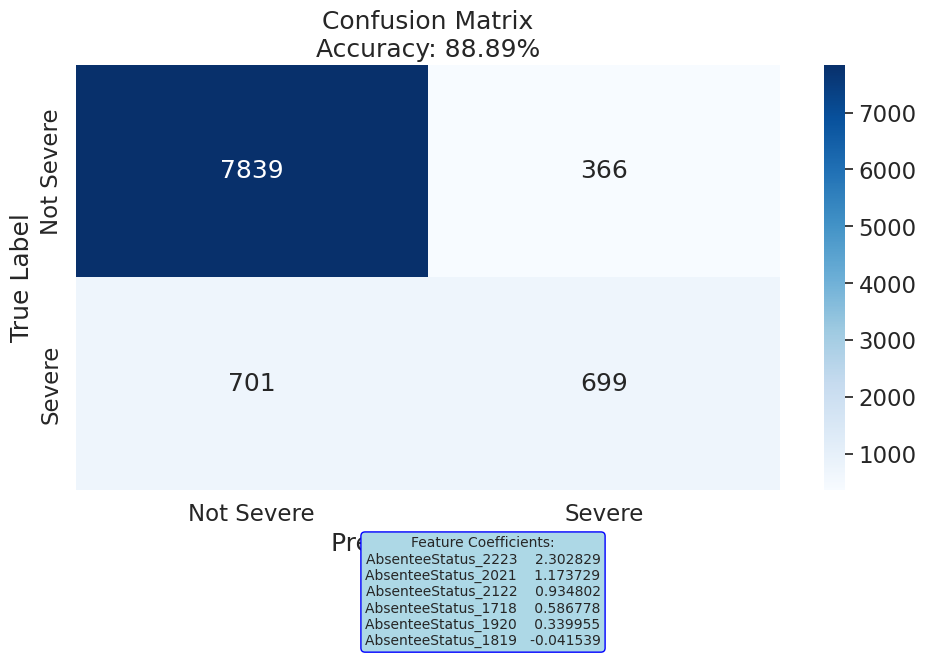

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix # Import confusion_matrix here

coefficients = pd.Series(model.coef_[0], index=features).sort_values(ascending=False)

# Generate confusion matrix
cm = confusion_matrix(y, y_pred)
cm_labels = ['Not Severe', 'Severe']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy * 100:.2f}%')

# Add coefficients to the plot
plt.figtext(0.5, -0.1, f"Feature Coefficients:\n{coefficients.to_string()}",
            wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(boxstyle="round", facecolor="lightblue", edgecolor="blue"))
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.5671399594320486

In [ ]:
#compare 2 models
#model 1: only year 22/23 attendance used
#model 2: all years used except 22/23
model1 = LogisticRegression()
model2 = LogisticRegression()
X1 = X[["AbsenteeStatus_2223"]]
X2 = X.drop("AbsenteeStatus_2223", axis = 1)
model1.fit(X1, y)
model2.fit(X2, y)

y_pred1 = model1.predict(X1)
y_pred2 = model2.predict(X2)

f1_score(y, y_pred1), f1_score(y, y_pred2)

(0.606215956424223, 0.3929292929292929)

In [ ]:
confusion_matrix(y, y_pred1), confusion_matrix(y, y_pred2)

(array([[7430,  775],
        [ 454,  946]]),
 array([[8014,  191],
        [1011,  389]]))

In [ ]:
model2.coef_

array([[0.65097949, 0.02473957, 0.66223882, 1.47258573, 1.9901539 ]])

In [ ]:
model1.coef_

array([[2.97922188]])

In [ ]:
df_binary

,AbsenteeStatus_1718,AbsenteeStatus_1819,AbsenteeStatus_1920,AbsenteeStatus_2021,AbsenteeStatus_2122,AbsenteeStatus_2223,AbsenteeStatus_2324
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9600,0,0,0,0,0,0,0
9601,0,1,0,0,1,1,1
9602,0,0,0,0,0,1,1
9603,0,1,1,1,1,1,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


X = df_binary[['AbsenteeStatus_1718', 'AbsenteeStatus_1819', 'AbsenteeStatus_1920',
               'AbsenteeStatus_2021', 'AbsenteeStatus_2122', 'AbsenteeStatus_2223']]
y = df_binary['AbsenteeStatus_2324']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Stacking classifier (ensemble)
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    final_estimator=LogisticRegression()
)

# Hyperparameter tuning (optional for best performance)
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'final_estimator__C': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(stacking_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Model Accuracy: 0.8807912545549194
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1640
           1       0.63      0.46      0.53       281

    accuracy                           0.88      1921
   macro avg       0.77      0.70      0.73      1921
weighted avg       0.87      0.88      0.87      1921



In [ ]:
#adjustments made for improvement within the model

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
gb_model = GradientBoostingClassifier(random_state=42)

stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    final_estimator=LogisticRegression()
)

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, 15],
    'gb__learning_rate': [0.05, 0.1],
    'gb__n_estimators': [100, 200],
    'final_estimator__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(stacking_model, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print metrics
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END final_estimator__C=0.1, gb__learning_rate=0.05, gb__n_estimators=100, rf__max_depth=5, rf__n_estimators=100; total time=   3.5s
[CV] END final_estimator__C=0.1, gb__learning_rate=0.05, gb__n_estimators=100, rf__max_depth=5, rf__n_estimators=100; total time=   3.5s
[CV] END final_estimator__C=0.1, gb__learning_rate=0.05, gb__n_estimators=100, rf__max_depth=5, rf__n_estimators=100; total time=   4.3s
[CV] END final_estimator__C=0.1, gb__learning_rate=0.05, gb__n_estimators=100, rf__max_depth=5, rf__n_estimators=200; total time=   5.5s
[CV] END final_estimator__C=0.1, gb__learning_rate=0.05, gb__n_estimators=100, rf__max_depth=5, rf__n_estimators=200; total time=   5.1s
[CV] END final_estimator__C=0.1, gb__learning_rate=0.05, gb__n_estimators=100, rf__max_depth=5, rf__n_estimators=200; total time=   6.6s
[CV] END final_estimator__C=0.1, gb__learning_rate=0.05, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=10

#Visualization


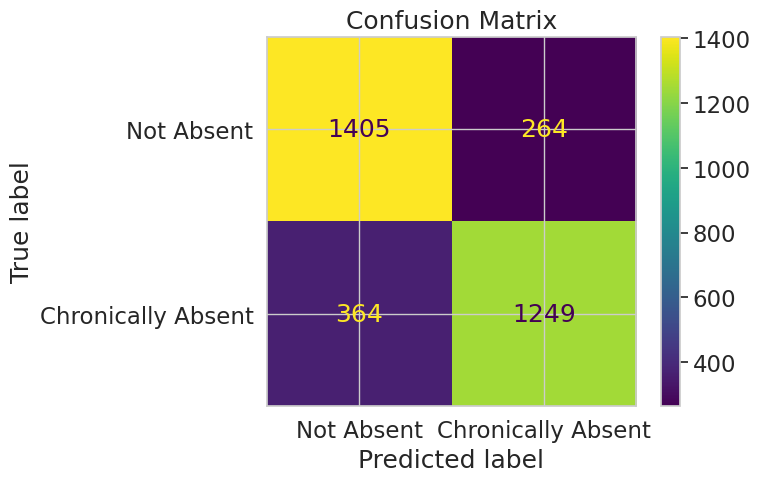

In [ ]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=['Not Absent', 'Chronically Absent'])
plt.title('Confusion Matrix')
plt.show()

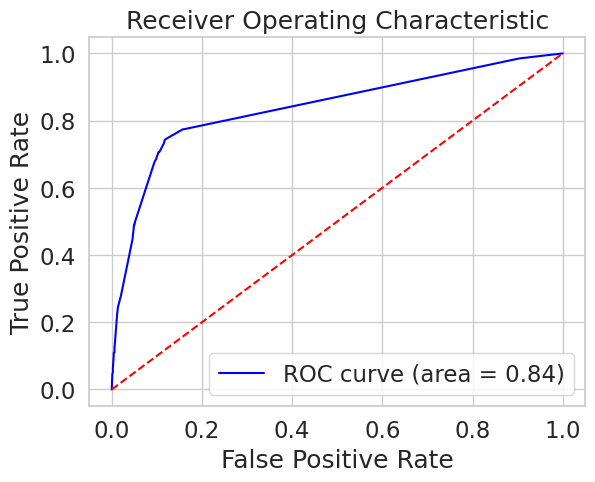

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

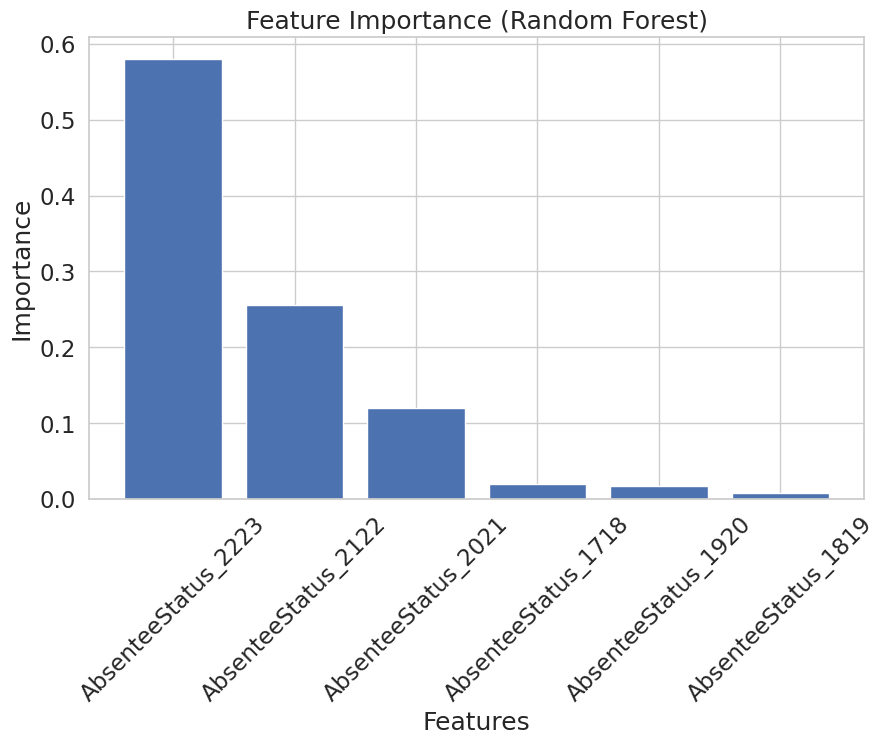

In [ ]:
#Feature Importance
import numpy as np

# Get feature importances from the Random Forest model
rf_importances = best_model.named_estimators_['rf'].feature_importances_

# Plot feature importances
features = X.columns
indices = np.argsort(rf_importances)[::-1]  # Sort in descending order
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), rf_importances[indices], align='center')
plt.xticks(range(len(features)), features[indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

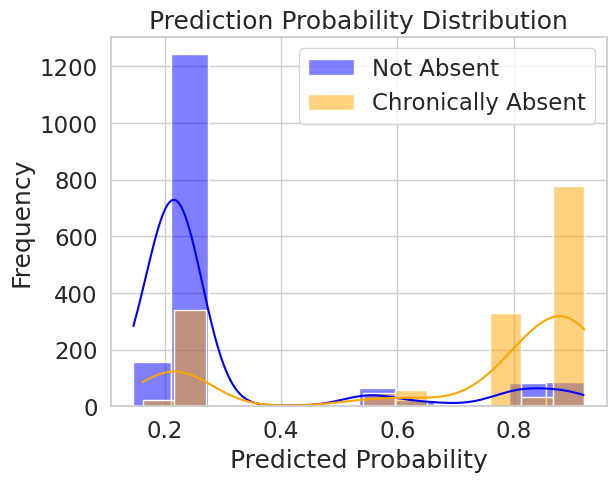

In [ ]:
#Prediction Distribution
import seaborn as sns

# Plot prediction probabilities
sns.histplot(y_pred_prob[y_test == 0], color='blue', label='Not Absent', kde=True)
sns.histplot(y_pred_prob[y_test == 1], color='orange', label='Chronically Absent', kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Prediction Probability Distribution')
plt.legend()
plt.show()
